<a href="https://colab.research.google.com/github/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S3_3_Ensemble_Learning_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3: Comparing (Ensemble of) Classifiers on MNIST Data

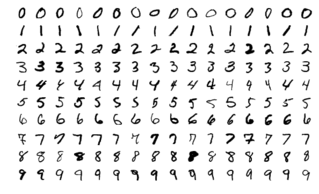

The goal is to train and compare individual classifiers on [MNIST data](https://en.wikipedia.org/wiki/MNIST_database), before combining them into an ensemble model. Will the power of teamwork shine through? 🔢

Let's start by loading the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database)!

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
# Setting `as_frame` to False to avoid loading mnist as Pandas dataframe
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Making sure we are working with 8-bit unsigned integers as targets
mnist.target = mnist.target.astype(np.uint8) 

**Q1) Split the MNIST dataset into a training, a validation, and a test sets**

Hint 1: The documentation for `scikit-learn`'s `train_test_split` function is [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Hint 2: You may use 50k instances for training, 10k instances for validation, and 10k instances for testing.

In [ ]:
# Import the necessary functions and utilities

In [ ]:
# Split the MNIST data into training, validation, and test

**Q2) Train various classifiers on the training set and compare them on the validation set**

Hint: You may compare a [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), an [`ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html), and a [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), but we encourage you to be creative and include additional classifiers you find promising! The more the merrier 😀

In [ ]:
# Import all the classifiers you need

In [ ]:
# Train all the classifiers you imported on the *training* set

In [ ]:
# Compare their accuracy on the *validation* set

Now it's time to make the individual classifiers vote to form an *ensemble* model

**Q3) Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.**

Hint: The documentation for `scikit-learn`'s [`VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) class can be found [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html). Note that its argument `voting` can be changed from `hard` to `soft`.

In [ ]:
# Import all the classes and functions you need

In [ ]:
# Define your voting classifier here

In [ ]:
# Train two voting classifiers with hard and soft voting

In [ ]:
# Calculate their mean accuracy on the validation set 
# (e.g., via the `score` attribute)

In [ ]:
# Compare it to the accuracy of individual classifiers

Hint: If your ensemble does significantly worse than individual classifiers, consider deleting the individual classifiers negatively affecting the performance of your ensemble using `del Voting_Classifier.estimators_[index_of_model_to_delete]`, where the `estimators_` attribute of your `Voting_Classifier`'s lists the individual classifiers that were trained as part of the ensemble.

In [ ]:
# Consider deleting the worse individual classifiers from your ensemble
# if they are clearly hurting the ensemble performance

Is hard or soft voting best in your case? 

**Q4) Does your ensemble clearly outperform your individual classifiers on the test set**

In [ ]:
# Calculate the mean accuracy of the ensemble on the test set

In [ ]:
# Does it clearly beat the best individual classifier?

Your voting classifier may only slightly beat the best model. Maybe voting isn't the best way to get the best prediction! 

Let's try the brute-force approach: Training a classifier on the individual model's predictions to beat the voting approach.

# Bonus Exercise 3: From Individual Classifiers to Ensemble Stacking via Blenders

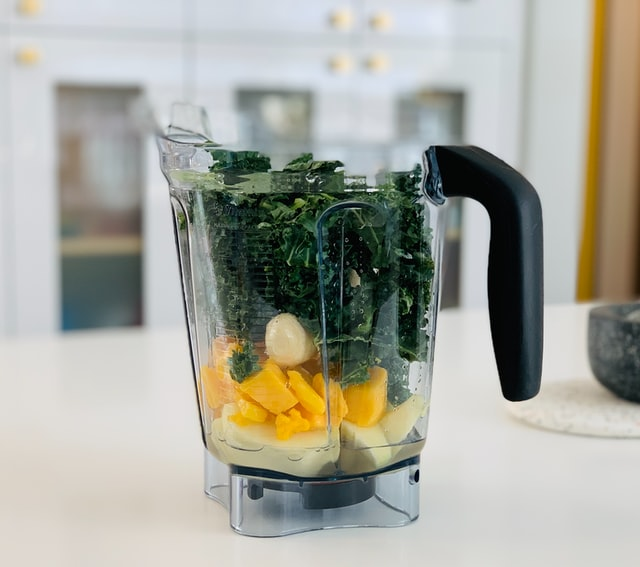

Let's learn how to best blend the individual classifiers' predictions!

**Q1) Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions**

Hint: The target stays the same, but now each training instance is a vector containing the set of predictions from all your individual classifiers. You may group all these vectors into a feature array `X_val_predictions` that should have the [shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html): `(Number_of_validation_instances,Number_of_individual_classifiers)`.

<a name="Q1"></a>

In [ ]:
# Create the new training set

In [ ]:
# Make sure it has the right shape and contains sensical values

**Q2) Train a classifier on this new training set**

Hint 1: You may train a [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Hint 2: You could fine-tune this blender or try other types of blenders (e.g., a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) or an [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)), then select the best one using cross-validation.

In [ ]:
# Fit the classifier to the new training set

In [ ]:
# Calculate its mean accuracy

In [ ]:
# (Optional) Try other classifiers on this new training set 
# if you're not satisfied with the new accuracy

Congratulations! 😃

You have just trained a blender, and together with classifiers they form a [stacking ensemble](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking). Now let's evaluate the ensemble on the test set.

**Q3) Evaluate the blender on the test set and compare it to the voting classifier you trained earlier**

Hint 1: You will have to first calculate the predictions of your individual classifiers on the test set, similar to what you did in [Question 1](#Q1).

Hint 2: Make sure you use the same score (e.g., the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) to compare both ensemble models.

In [ ]:
# Calculate the predictions of your individual classifiers on the test set
# and format them so you can feed them to your blender

In [ ]:
# Calculate the mean accuracy of the blender on the test set

In [ ]:
# Compare it to the mean accuracy of individual models and the voting classifier

Is the blender worth the effort?